## Library Dependencies

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os

sns.set()

In [2]:
if not os.path.exists('../../Graphs/Census_Data_As_Scale/Expanding_Window'):
    os.makedirs('../../Graphs/Census_Data_As_Scale/Expanding_Window')

## Importing Baltimore calls for service dataset

In [3]:
data = pd.read_csv('../../Clean Dataset/BPD_Part_1_Victim_Based_Crime_Data.csv')
data.head()

/opt/anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3058: DtypeWarning: Columns (7) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,CrimeDate,CrimeTime,CrimeCode,Location,Description,Inside/Outside,Weapon,Post,District,Neighborhood,Longitude,Latitude,Location 1,Premise,vri_name1,Total Incidents
0,06/06/2020,15:32:00,4E,800 RICHWOOD AVE,COMMON ASSAULT,I,NaN,524,NORTHERN,RICHNOR SPRINGS,-76.604920,39.346381,NaN,ROW/TOWNHOUSE-OCC,NaN,1
1,06/06/2020,09:16:00,5C,6000 AMBERWOOD RD,BURGLARY,I,NaN,443,NORTHEAST,FRANKFORD,-76.543350,39.316302,NaN,APT/CONDO - OCCUPIED,NaN,1
2,06/06/2020,13:23:00,6G,1100 ORLEANS ST,LARCENY,I,NaN,211,EASTERN,PLEASENT VIEW GARDENS,-76.602911,39.294721,NaN,ROW/TOWNHOUSE-OCC,NaN,1
3,06/06/2020,08:35:00,6G,2700 BERYL AVE,LARCENY,I,NaN,333,EASTERN,BIDDLE STREET,-76.579613,39.303053,NaN,OTHER/RESIDENTIAL,Eastern 2,1
4,06/06/2020,08:35:00,6G,2700 BERYL AVE,LARCENY,I,NaN,333,EASTERN,BIDDLE STREET,-76.579613,39.303053,NaN,OTHER/RESIDENTIAL,Eastern 2,1


In [4]:
data.describe()

,Longitude,Latitude,Location 1,Total Incidents
count,292522.000000,292522.000000,0.0,293687.0
mean,-76.617597,39.306884,NaN,1.0
std,0.043687,0.029655,NaN,0.0
min,-81.529189,37.577262,NaN,1.0
25%,-76.649274,39.288340,NaN,1.0
50%,-76.614162,39.303115,NaN,1.0
75%,-76.587114,39.327111,NaN,1.0
max,-76.383228,39.661332,NaN,1.0


In [5]:
columns_in_use = ['CrimeDate', 'District']
columns_in_use

['CrimeDate', 'District']

In [6]:
data = data[columns_in_use]
data.head()

,CrimeDate,District
0,06/06/2020,NORTHERN
1,06/06/2020,NORTHEAST
2,06/06/2020,EASTERN
3,06/06/2020,EASTERN
4,06/06/2020,EASTERN


In [7]:
data.describe()

,CrimeDate,District
count,293687,293687
unique,2418,10
top,04/27/2015,NORTHEAST
freq,389,44236


In [8]:
null_count = 0

for i in columns_in_use:
    rows_with_null_values = data[data[i].isnull()].index
    print ('Number of Rows with null values in Column %s = %s'%(i, len(rows_with_null_values)))
    data = data.drop(rows_with_null_values, axis = 0)
    null_count += len(rows_with_null_values)

print ('Number of rows droped = ', null_count)
print ('Number of rows after droping null values = ', data.shape[0])
print ('Data Frame Shape: \n\t Number of Rows = %s \n\t Number of Columns = %s '%(data.shape[0], data.shape[1]))

Number of Rows with null values in Column CrimeDate = 0
Number of Rows with null values in Column District = 0
Number of rows droped =  0
Number of rows after droping null values =  293687
Data Frame Shape: 
	 Number of Rows = 293687 
	 Number of Columns = 2 


## Droping Rows with Unknown Police Districts

In [9]:
rows_with_unknowon_district = data[data['District'] == 'UNKNOWN'].index
print ('Number of Rows with null values in Column %s = %s'%(i, len(rows_with_unknowon_district)))
data = data.drop(rows_with_unknowon_district, axis = 0)

null_count += len(rows_with_unknowon_district)
print ('Number of rows droped = ', null_count)
print ('Number of rows after droping null values = ', data.shape[0])
print ('Data Frame Shape: \n\t Number of Rows = %s \n\t Number of Columns = %s '%(data.shape[0], data.shape[1]))

Number of Rows with null values in Column District = 337
Number of rows droped =  337
Number of rows after droping null values =  293350
Data Frame Shape: 
	 Number of Rows = 293350 
	 Number of Columns = 2 


In [10]:
data['CrimeDate']  = pd.to_datetime(data['CrimeDate'])
data.head()

,CrimeDate,District
0,2020-06-06,NORTHERN
1,2020-06-06,NORTHEAST
2,2020-06-06,EASTERN
3,2020-06-06,EASTERN
4,2020-06-06,EASTERN


## Creating Different Time features

In [11]:
day_of_week = data['CrimeDate'].dt.dayofweek
week = data['CrimeDate'].dt.week
month = data['CrimeDate'].dt.month
year = data['CrimeDate'].dt.year

data['Day'] = day_of_week
data['Week'] = week
data['Month'] = month
data['Year'] = year

data.head()

,CrimeDate,District,Day,Week,Month,Year
0,2020-06-06,NORTHERN,5,23,6,2020
1,2020-06-06,NORTHEAST,5,23,6,2020
2,2020-06-06,EASTERN,5,23,6,2020
3,2020-06-06,EASTERN,5,23,6,2020
4,2020-06-06,EASTERN,5,23,6,2020


## Consider data from 2014 and beyond

In [12]:
data = data[data['Year']>= 2014]

In [13]:
data.describe()

,Day,Week,Month,Year
count,293270.000000,293270.000000,293270.000000,293270.000000
mean,2.957531,26.589849,6.514482,2016.687350
std,1.989160,14.788523,3.392183,1.805081
min,0.000000,1.000000,1.000000,2014.000000
25%,1.000000,14.000000,4.000000,2015.000000
50%,3.000000,26.000000,7.000000,2017.000000
75%,5.000000,39.000000,9.000000,2018.000000
max,6.000000,53.000000,12.000000,2020.000000


## Creating Times Series Dataset

In [14]:
def ts_data_creation(group_by_parameter, data):
    if group_by_parameter == 'Week' or group_by_parameter == 'Month':
        pass
    else:
        raise AttributeError('group_by_parameter')
    
    if group_by_parameter == 'Week':
        parameter_name = 'Week_Number'
    else:
        parameter_name = 'Month_Number'
        
    PoliceDistricts = set(data['District'])
    ts_data = {}
    for district in PoliceDistricts:
        ts_data_temp = []
        for year_num, year_value in data[data['District'] == district].groupby('Year'):
            for parameter_num, parameter_value in year_value[year_value['District'] == district].groupby(group_by_parameter):
                total_crimes = len(parameter_value)
                year_parameter_num = "%s_%s"%(year_num, parameter_num)
                ts_data_temp.append([year_num] + [district, parameter_num, year_parameter_num] + [total_crimes])
        ts_data_temp = pd.DataFrame(ts_data_temp, columns = ['Year', 'PoliceDistrict', parameter_name, 'Year_%s'%parameter_name, 'NoOfCrimes'])
        ts_data[district] = ts_data_temp
    
    return ts_data

In [15]:
ts_data_week = ts_data_creation('Week', data)
ts_data_week

{'NORTHERN':      Year PoliceDistrict  Week_Number Year_Week_Number  NoOfCrimes
 0    2014       NORTHERN            1           2014_1         101
 1    2014       NORTHERN            2           2014_2          95
 2    2014       NORTHERN            3           2014_3          93
 3    2014       NORTHERN            4           2014_4          86
 4    2014       NORTHERN            5           2014_5          80
 ..    ...            ...          ...              ...         ...
 332  2020       NORTHERN           19          2020_19          54
 333  2020       NORTHERN           20          2020_20          81
 334  2020       NORTHERN           21          2020_21          71
 335  2020       NORTHERN           22          2020_22          58
 336  2020       NORTHERN           23          2020_23          38
 
 [337 rows x 5 columns],
 'WESTERN':      Year PoliceDistrict  Week_Number Year_Week_Number  NoOfCrimes
 0    2014        WESTERN            1           2014_1          7

## Importing Population Dataset

In [16]:
population_data = pd.read_csv('../../Clean Dataset/Population_By_PoliceDistrict.csv')
population_data

,Police District,Population
0,CENTRAL,34300
1,NORTHERN,95194
2,NORTHWEST,78736
3,WESTERN,39691
4,EASTERN,42653
5,NORTHEAST,155040
6,SOUTHEAST,69535
7,SOUTHERN,60141
8,SOUTHWEST,68743


### Using Population as a Scale
Our goal is to find number of crimes in a police district per 10,000 people

In [17]:
districts = data['District'].unique()
for district in districts:
    number_of_people = population_data[population_data['Police District'] == district]['Population'].values[0]
    crime_per_10k = ts_data_week[district]['NoOfCrimes'] / number_of_people * 10000
    ts_data_week[district]['NoOfCrimes'] = crime_per_10k.round(0).astype(int)
ts_data_week

{'NORTHERN':      Year PoliceDistrict  Week_Number Year_Week_Number  NoOfCrimes
 0    2014       NORTHERN            1           2014_1          11
 1    2014       NORTHERN            2           2014_2          10
 2    2014       NORTHERN            3           2014_3          10
 3    2014       NORTHERN            4           2014_4           9
 4    2014       NORTHERN            5           2014_5           8
 ..    ...            ...          ...              ...         ...
 332  2020       NORTHERN           19          2020_19           6
 333  2020       NORTHERN           20          2020_20           9
 334  2020       NORTHERN           21          2020_21           7
 335  2020       NORTHERN           22          2020_22           6
 336  2020       NORTHERN           23          2020_23           4
 
 [337 rows x 5 columns],
 'WESTERN':      Year PoliceDistrict  Week_Number Year_Week_Number  NoOfCrimes
 0    2014        WESTERN            1           2014_1          1

# Make Forecasting Frame

In [18]:
ts_data_week['NORTHEAST'].head()

,Year,PoliceDistrict,Week_Number,Year_Week_Number,NoOfCrimes
0,2014,NORTHEAST,1,2014_1,8
1,2014,NORTHEAST,2,2014_2,7
2,2014,NORTHEAST,3,2014_3,9
3,2014,NORTHEAST,4,2014_4,8
4,2014,NORTHEAST,5,2014_5,7


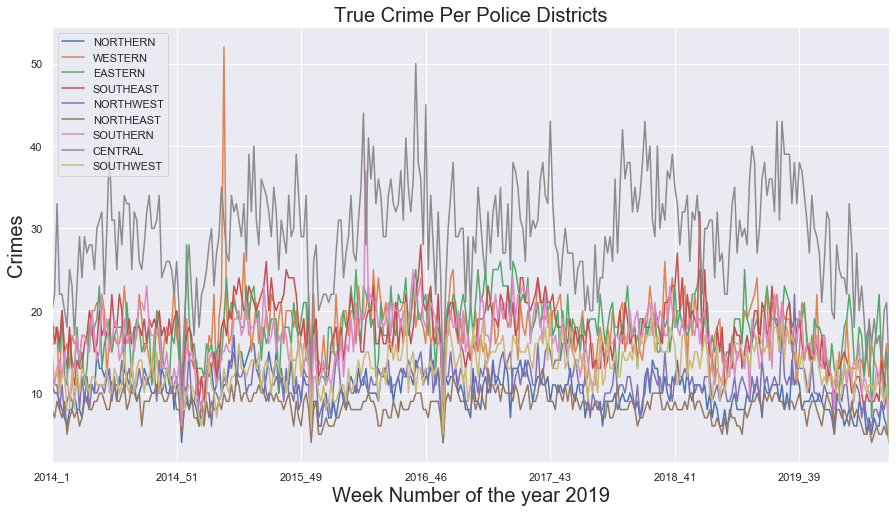

In [19]:
districts = set(data['District'])
df = pd.DataFrame()

for i in districts:
    values = ts_data_week[i]['NoOfCrimes'].tolist()
    index = ts_data_week[i]['Year_Week_Number'].tolist()
    temp_df = pd.DataFrame(values, columns = [i], index = index)
    df = pd.concat([df, temp_df], axis = 1)
    

df.plot(figsize=(15,8))
plt.xlabel('Week Number of the year 2019', fontsize=20)
plt.ylabel('Crimes', fontsize=20)
plt.title('True Crime Per Police Districts', fontsize=20)
plt.savefig('../../Graphs/Census_Data_As_Scale/Expanding_Window/policeDistrictCrimes.jpg')
plt.show()


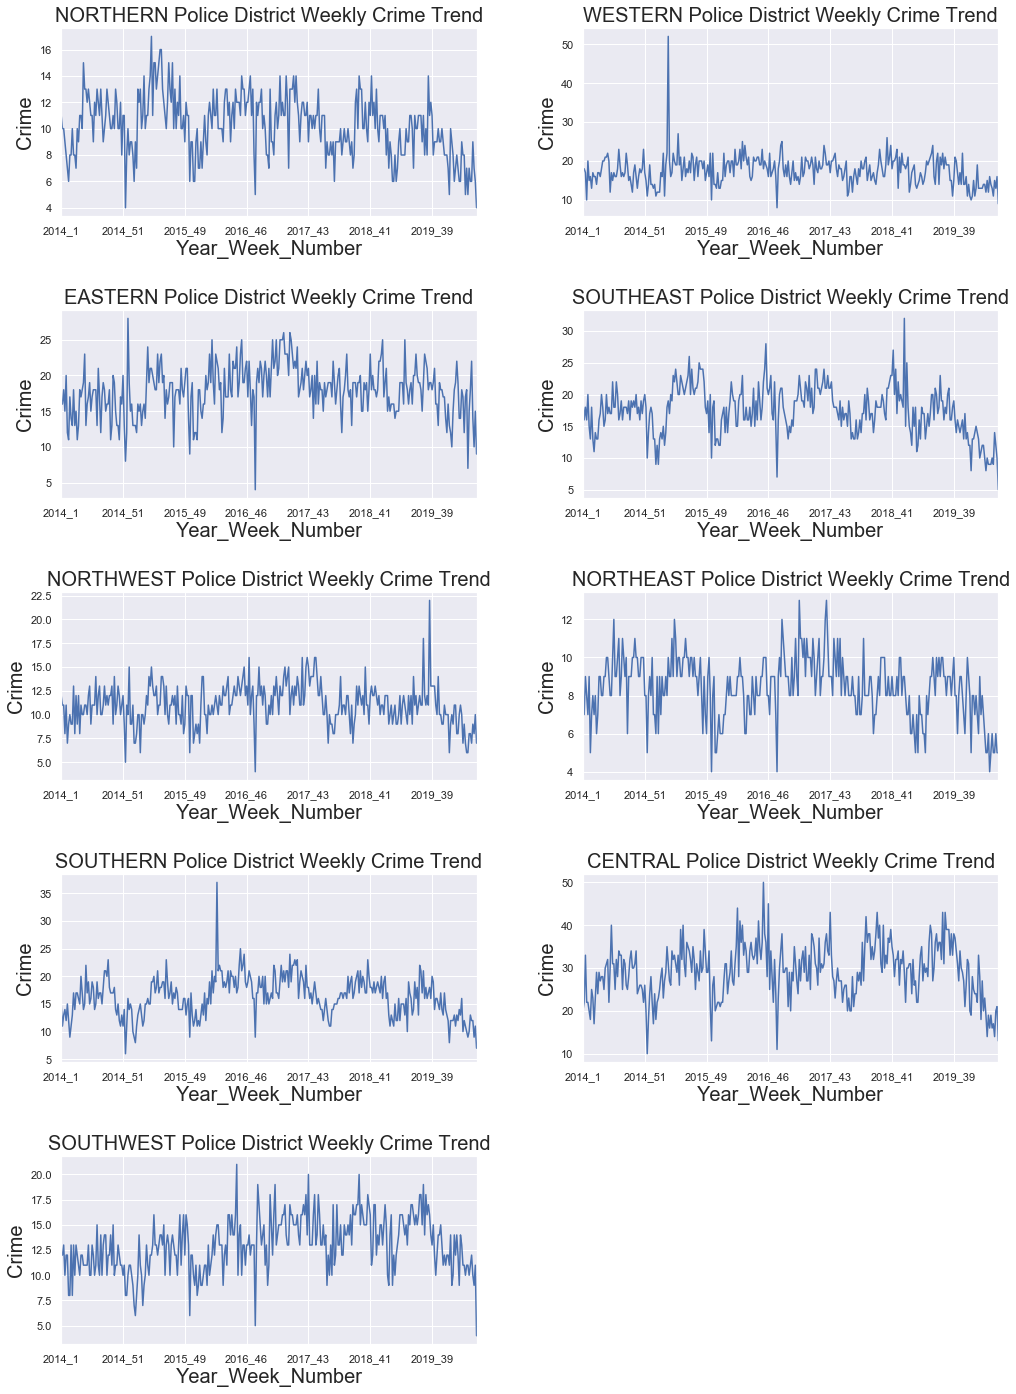

In [20]:
fig = plt.figure()
dist = list(districts)
i = 0

for pd_col in df:
    ax = '52%s'%(i+1)
    axis = fig.add_subplot(int(ax))
    df[pd_col].plot(ax = axis, figsize = (15,20))
    plt.xlabel('Year_Week_Number', fontsize = 20)
    plt.ylabel('Crime', fontsize = 20)
    title = '%s Police District Weekly Crime Trend' % dist[i]
    plt.title(title, fontsize = 20)
    i += 1
    
fig.tight_layout(pad=3.0) 
plt.savefig('../../Graphs/Census_Data_As_Scale/Expanding_Window/True_Crime_Baltimre.jpg')

## Time Series Feature Extraction 

### Library Dependencies for making forecasting frame and Extracting time series features from it.

In [21]:
from tsfresh.utilities.dataframe_functions import make_forecasting_frame
from tsfresh.utilities.dataframe_functions import impute
from tsfresh import extract_features

### Takes one police district at a time and creates forecating frame and its output (total cirme) for that district and append it to a list called temp_df. 

In [22]:
districts = set(data['District'])
df_shift = pd.DataFrame()
temp_df = []
for district in districts:
    temp_shift, temp_y = make_forecasting_frame(ts_data_week[district]['NoOfCrimes'], kind="crimes", max_timeshift=20, rolling_direction=1) 
    temp_df.append([temp_shift, temp_y])

### Create Time sereies features from make forecasting frames using tsfresh

In [23]:
ts_features = []

for i in temp_df:
    X = extract_features(i[0], column_id="id", column_sort="time", column_value="value", 
                             impute_function=impute, show_warnings=False)
    ts_features.append([X, i[1]])

Feature Extraction: 100%|██████████| 20/20 [00:04<00:00,  4.06it/s]


### Removing constant features

In [24]:
for i in ts_features:
    print (i[0].shape)
    i[0] = i[0].loc[:, i[0].apply(pd.Series.nunique) != 1] 
    print (i[0].shape)

(336, 754)
(336, 344)
(336, 754)
(336, 344)
(336, 754)
(336, 344)
(336, 754)
(336, 349)
(336, 754)
(336, 344)
(336, 754)
(336, 349)
(336, 754)
(336, 349)
(336, 754)
(336, 349)
(336, 754)
(336, 344)


### Adding a lag of 1 into the extraced time series feature dataframe

In [25]:
for i in ts_features:
    i[0]["feature_last_value"] = i[1].shift(1)

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


### Droping the first row becuase of null value created due ot lag

In [26]:
for i in ts_features:
    i[0] = i[0].iloc[1:, ]
    i[1] = i[1].iloc[1: ]

## Training and Tesing the models
### Libray dependencies for different models and their evaluation metrics

In [27]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
import sklearn.utils
import numpy as np
from sklearn.neural_network import MLPRegressor
from sklearn.svm import SVR
from sklearn.ensemble import AdaBoostRegressor

import tqdm

### Expanding Window Forecast - 
An expanding window refers to a model that train on all available historic data and uses that to make a forecast.

It is an expanding window because it grows as more real observations are collected.

#### Traing random forest regressor using expanding window forecast approach and random forest regressor performance

In [28]:
y_pred = [[np.NaN] * len(ts_features[0][1]) for i in range(len(ts_features))]

isp = 284   # index of where to start the predictions
assert isp > 0

index = 0
district = 1
for i in ts_features:
    print ("Current District Number = %s"%district)
    district += 1
    RFR = RandomForestRegressor()
    for j in tqdm.tqdm(range(isp, len(i[1]))):
        RFR.fit(i[0].iloc[:j], i[1][:j])
        y_pred[index][j] = RFR.predict(i[0].iloc[j, :].values.reshape((1, -1)))[0]
    index += 1

# #### Evaluation of random forest regressor prediction with actual value
    
# y = []
# prediction = {}
# for i in range(len(temp_df)):
#     y_true = np.array(temp_df[i][1].tolist())
#     y_predicted = np.array(y_pred[i])
#     temp = pd.DataFrame([y_true, y_predicted], index = ['True', 'Pred']).T 
#     y.append(temp)
    
#     dist = list(districts)[i]
#     temp_pred = [np.nan] + y_pred[i]
#     MSE = mean_squared_error(y_true[311:], temp_pred[311:])
#     MAE = mean_absolute_error(y_true[311:], temp_pred[311:])
#     prediction[dist] = {'MSE': MSE, 'MAE': MAE}
#     print ('Mean Squared Error for district %s = %s'%(dist, MSE))
#     print ('Mean Absolute Error for district %s = %s\n\n'%(dist, MAE))

# #### Finding average of MSE and MAE

# total_MSE = 0
# total_MAE = 0
# for i in prediction:
#     total_MSE += prediction[i]['MSE']
#     total_MAE += prediction[i]['MAE']
    
# avg_MSE = total_MSE/len(districts)
# avg_MAE = total_MAE/len(districts)

# print ('Average of Mean Squared Error = %s'%avg_MSE)
# print ('Average of Mean Absolute Error = %s'%avg_MAE)

  0%|          | 0/51 [00:00<?, ?it/s]

Current District Number = 1


  0%|          | 0/51 [00:00<?, ?it/s]

Current District Number = 2


  0%|          | 0/51 [00:00<?, ?it/s]

Current District Number = 3


  0%|          | 0/51 [00:00<?, ?it/s]

Current District Number = 4


  0%|          | 0/51 [00:00<?, ?it/s]

Current District Number = 5


  0%|          | 0/51 [00:00<?, ?it/s]

Current District Number = 6


  0%|          | 0/51 [00:00<?, ?it/s]

Current District Number = 7


  0%|          | 0/51 [00:00<?, ?it/s]

Current District Number = 8


  0%|          | 0/51 [00:00<?, ?it/s]

Current District Number = 9


100%|██████████| 51/51 [01:48<00:00,  2.12s/it]


In [29]:
y = []
prediction = {}
for i in range(len(temp_df)):
    y_true = np.array(temp_df[i][1].tolist())
    y_predicted = np.array(y_pred[i])
    temp = pd.DataFrame([y_true, y_predicted], index = ['True', 'Pred']).T 
    y.append(temp)
    
    dist = list(districts)[i]
    temp_pred = [np.nan] + y_pred[i]
    MSE = mean_squared_error(y_true[285:], temp_pred[285:])
    MAE = mean_absolute_error(y_true[285:], temp_pred[285:])
    prediction[dist] = {'MSE': MSE, 'MAE': MAE}
    print ('Mean Squared Error for district %s = %s'%(dist, MSE))
    print ('Mean Absolute Error for district %s = %s\n\n'%(dist, MAE))

#### Finding average of MSE and MAE

total_MSE = 0
total_MAE = 0
for i in prediction:
    total_MSE += prediction[i]['MSE']
    total_MAE += prediction[i]['MAE']
    
avg_MSE = total_MSE/len(districts)
avg_MAE = total_MAE/len(districts)

print ('Average of Mean Squared Error = %s'%avg_MSE)
print ('Average of Mean Absolute Error = %s'%avg_MAE)

Mean Squared Error for district NORTHERN = 3.2319235294117643
Mean Absolute Error for district NORTHERN = 1.4417647058823526


Mean Squared Error for district WESTERN = 12.307876470588232
Mean Absolute Error for district WESTERN = 2.9598039215686276


Mean Squared Error for district EASTERN = 11.434054901960781
Mean Absolute Error for district EASTERN = 2.5756862745098044


Mean Squared Error for district SOUTHEAST = 6.947574509803921
Mean Absolute Error for district SOUTHEAST = 2.0782352941176465


Mean Squared Error for district NORTHWEST = 6.3347588235294126
Mean Absolute Error for district NORTHWEST = 1.7080392156862743


Mean Squared Error for district NORTHEAST = 1.6000980392156863
Mean Absolute Error for district NORTHEAST = 0.9713725490196078


Mean Squared Error for district SOUTHERN = 6.692043137254902
Mean Absolute Error for district SOUTHERN = 2.139607843137255


Mean Squared Error for district CENTRAL = 28.22626862745098
Mean Absolute Error for district CENTRAL = 4.2515686

#### Random Forest regressor prediction visualization 

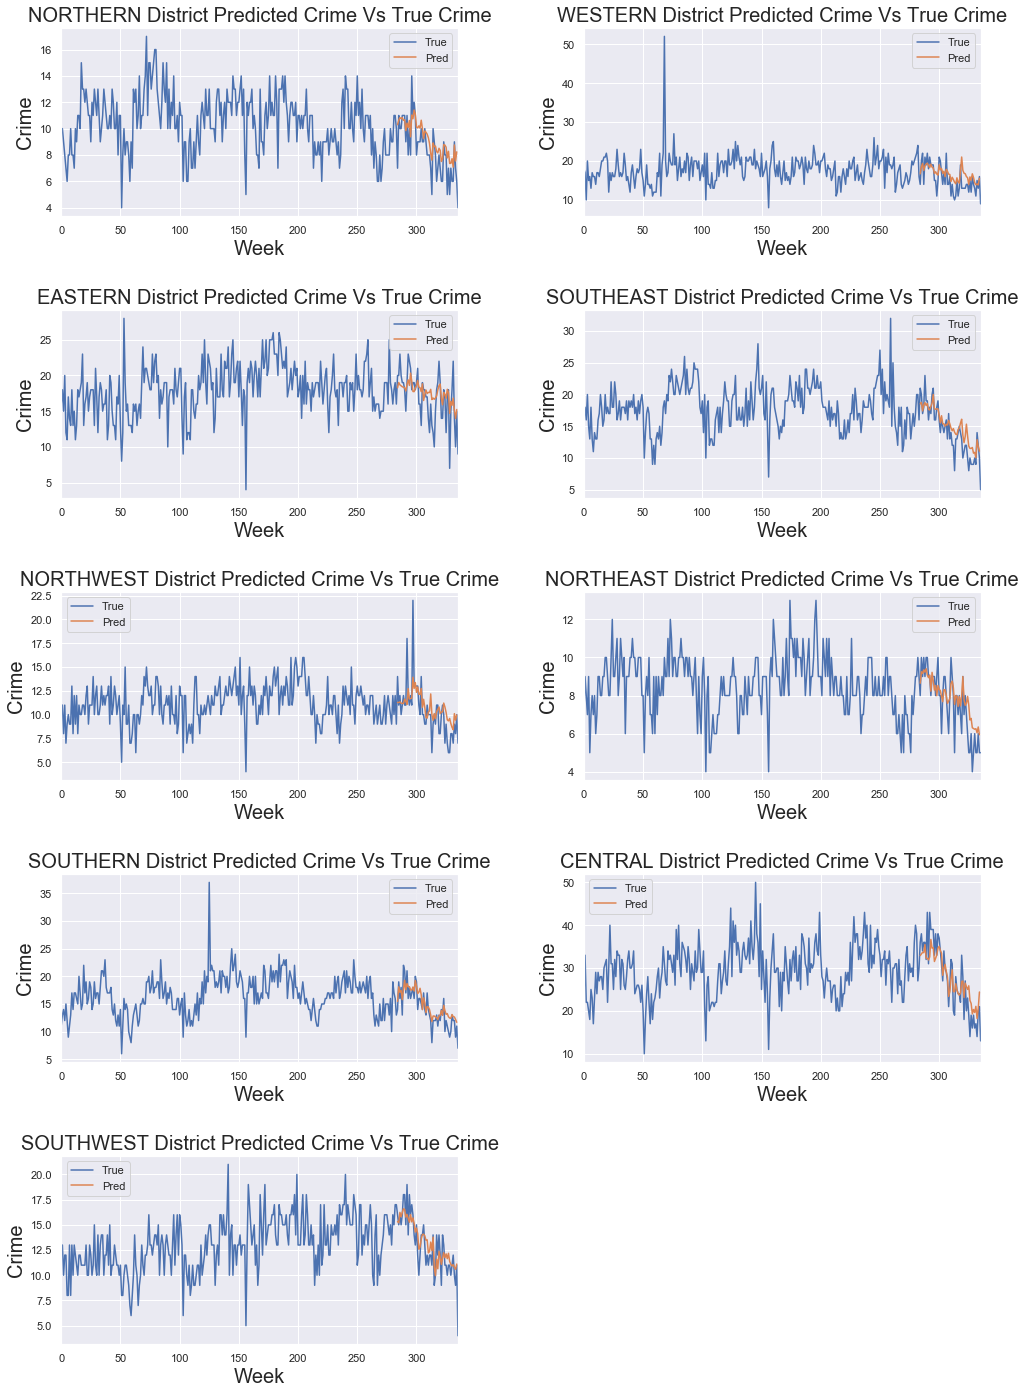

In [30]:
fig = plt.figure()
dist = list(districts)

for i in range(0, 9):
    ax = '52%s'%(i+1)
    axis = fig.add_subplot(int(ax))
    y[i].plot(ax = axis, figsize = (15,20))
    plt.xlabel('Week', fontsize = 20)
    plt.ylabel('Crime', fontsize = 20)
    title = '%s District Predicted Crime Vs True Crime' % dist[i]
    plt.title(title, fontsize = 20)
    
fig.tight_layout(pad=3.0) 
plt.savefig('../../Graphs/Census_Data_As_Scale/Expanding_Window/Predicted_Crime_Vs_True_Crime_RFR.jpg')